Figures for Section 3.3

In [127]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import pacf
from statsmodels.graphics.tsaplots import acf
from statsmodels.tsa.stattools import adfuller  # check stationary
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import scatter_matrix

np.random.seed(12345)

In [5]:
# create ARMA
def createARMA(ar_l,ma_l,n_samples):
    ar = np.array(ar_l)
    ma = np.array(ma_l)

    return ArmaProcess(ar, ma).generate_sample(nsample=n_samples)
    #return ArmaProcess(ar, ma, n_samples)

In [16]:
# calculate acf and pacf
def acfPacf(data):
    v1 = acf(data, nlags=25)
    v2 = pacf(data, nlags=25)

    return v1,v2

In [29]:
def plotARMA(simulated_data, nax, axs):
    plot_acf(simulated_data, lags=25, ax=axs[nax,0])
    plot_pacf(simulated_data, lags=25, ax=axs[nax,1])

    #lag_acf = acf(simulated_data, nlags=25)
    #lag_pacf = pacf(simulated_data, nlags=25)

    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax1.plot(lag_acf, 'o-')  

    #ax2.plot(lag_pacf, 'o-')  

    #plt.title(f"Simulated ARMA({p},{q}) Process")
    #plt.xlim([0, 100])
    #plt.show()

Figure 3.5

The ACFs and PACFs of an AR(2) process (upper panel), and MA(3) process (middle panel)
and and ARMA(1,1) process (lower panel).

In [61]:
n_samples = 100

# Define ARMA(2,0)
ar_arr = [1, -1.5, 0.75]
ma_arr = [1]
arma20 = createARMA(ar_arr,ma_arr,n_samples)
acf20, pacf20 = acfPacf(arma20)


# Define ARMA(0,3)
ar_arr = [1]
ma_arr = [1, 1.5, -0.75, 3]
arma03 = createARMA(ar_arr,ma_arr,n_samples)
acf03, pacf03 = acfPacf(arma03)

# Define ARMA(1,1)
ar_arr = [1, -0.7]
ma_arr = [1, 0.3]
arma11 = createARMA(ar_arr,ma_arr,n_samples)
acf11, pacf11 = acfPacf(arma11)


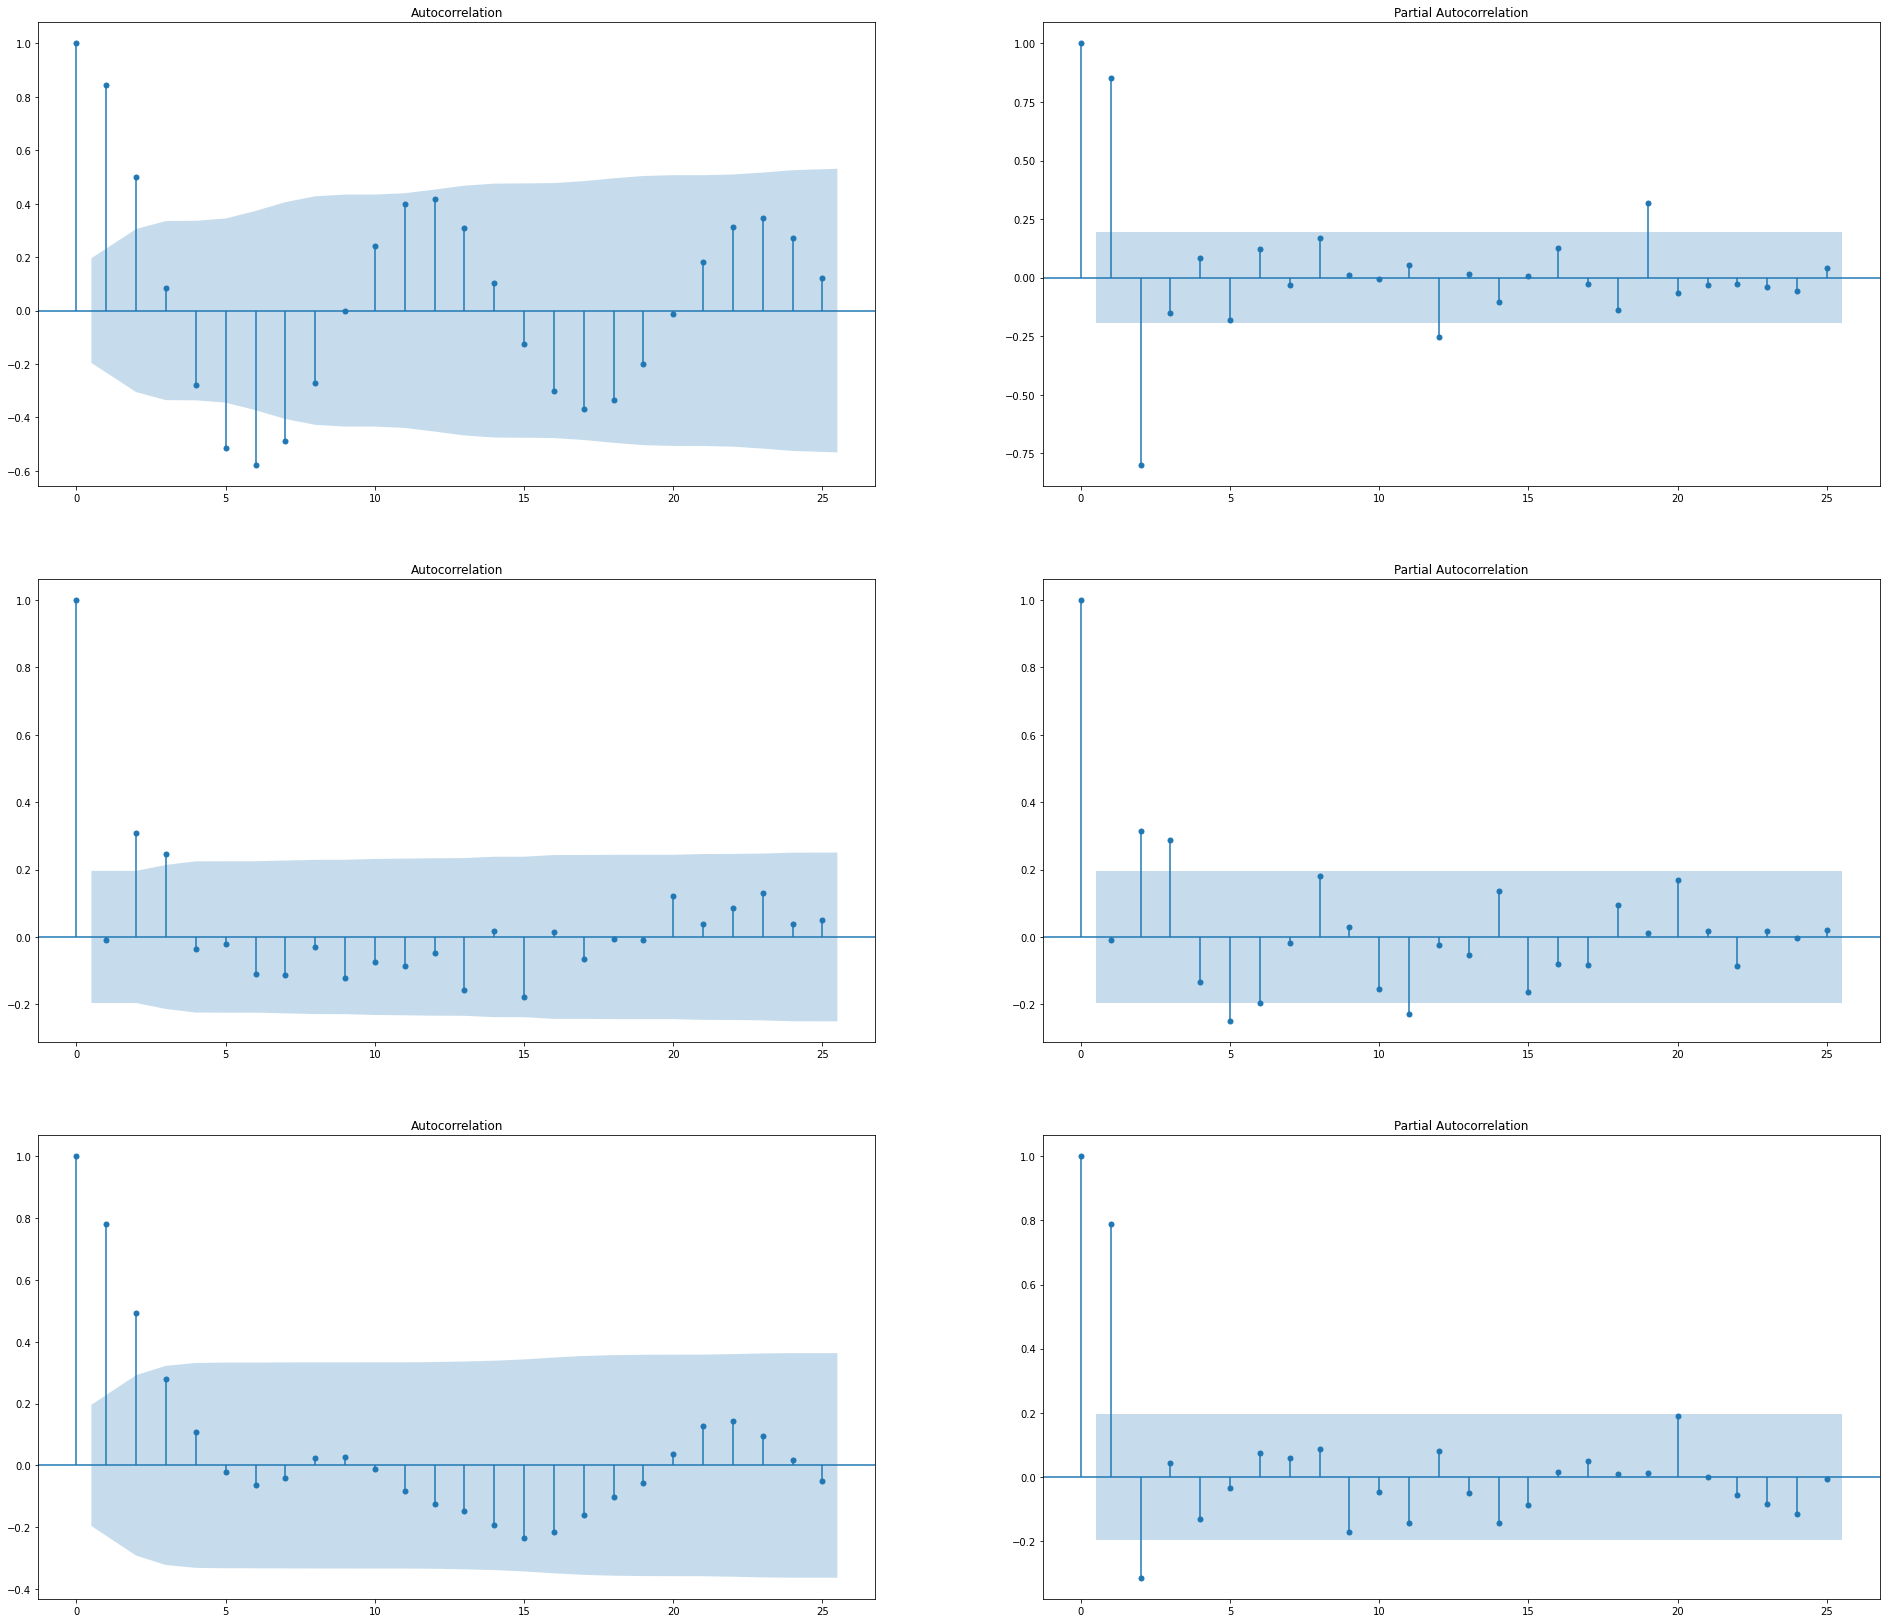

In [119]:
fig, axs = plt.subplots(3, 2, figsize=(33,29))
plotARMA(arma20,0,axs)
plotARMA(arma03,1,axs)
plotARMA(arma11,2,axs)
#plot_acf(arma20, lags=25, ax=axs[0,0])
#plot_pacf(arma20, lags=25, ax=axs[0,1])

plt.show()

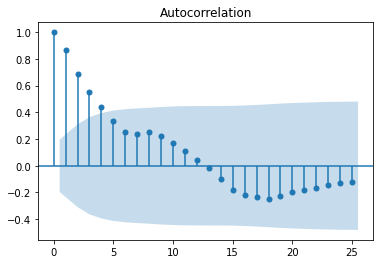

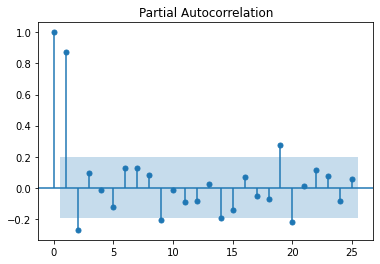

In [64]:
arparams = np.array([.7])
maparams = np.array([.3])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = ArmaProcess(ar, ma)
simulated_data = arma_process.generate_sample(nsample=100)

plot_acf(simulated_data, lags=25);
plot_pacf(simulated_data, lags=25);


Figure 3.6

The recruitment series of Example 3.3.5 (left), its sample ACF (middle) and sample PACF (right).

Change data to `airline-passengers.csv`. 

In [113]:
# Load the AirPassengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)
passengers = data['Passengers'].values

# decompose
decompose = seasonal_decompose(passengers,model='additive', period=7)
trend = decompose.trend
seasonal = decompose.seasonal
res = decompose.resid
# check the residuals
#print(res)
# remove nan valus
res = res[~np.isnan(res)]

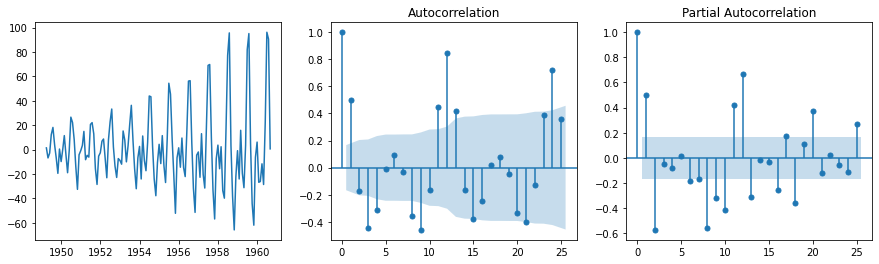

In [125]:
# set sticks for residuals
times_res = np.arange(np.datetime64('1949-04'),
                  np.datetime64('1960-10'))
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].plot(times_res, res)
plot_acf(res,lags=25,ax=axs[1])
plot_pacf(res, lags=25,ax=axs[2])
plt.show()

In [120]:
# set xticks
#times = np.arange(np.datetime64('1949-01'),np.datetime64('1961-01'))
#fig, axs = plt.subplots(1, 3, figsize=(13,3))
#axs[0].plot(times, passengers)
#plot_acf(passengers,lags=25,ax=axs[1])
#plot_pacf(passengers, lags=25,ax=axs[2])
#plt.show()

In [112]:
# check stationarity
adfuller(res)

(-4.843615959601481,
 4.484653229594709e-05,
 14,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 846.651308501306)

Because the `p-value` is 4.846e-05, which is much smaller than 0.05, so we conclude it's stationary. 

In [117]:
#adfuller(passengers)

Figure 3.7 

Scatterplot matrix relating current passengers to past passengers for the lags $h = 1, \ldots, 12$.

In [128]:
type(pd.Series(res).diff())

pandas.core.series.Series

array([[<AxesSubplot:xlabel='res', ylabel='res'>,
        <AxesSubplot:xlabel='lag', ylabel='res'>],
       [<AxesSubplot:xlabel='res', ylabel='lag'>,
        <AxesSubplot:xlabel='lag', ylabel='lag'>]], dtype=object)

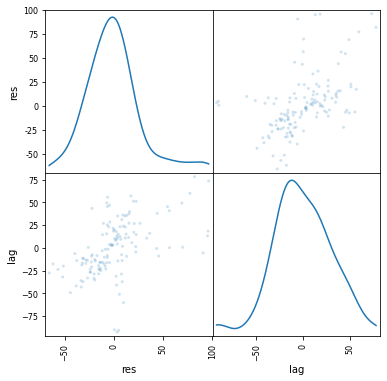

In [130]:
data = pd.Series(res)
# obtain the lag-h
datah = data.diff()
d = {'res':data, 'lag':datah}
df = pd.DataFrame(d)

scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

In [ ]:
# define 12 dataframe containing the original data and the lag-h data
def scatterMat(data, h):
    # change the data to pandas.Series
    data = pd.Series(data)
    # obtain the lag-h
    datah = data.diff(h)
    d = {'passengers':data, 'lag':datah}
    df = pd.DataFrame(d)
    
    scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')
    

References

1. https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d
2. https://stackoverflow.com/questions/58797648/displaying-statsmodels-plot-acf-and-plot-pacf-side-by-side-in-a-jupyter-notebook
3. https://builtin.com/data-science/time-series-python (seasonal_decompose)
4. https://www.timescale.com/blog/tools-for-working-with-time-series-analysis-in-python/ (Air Passengers dataset)